In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/Users/meetsudra/Documents/GitHub/timeseries/datasets/CO2 Concentration.csv")
df.head()

,Year,Month,CO2 Concentration
0,1975,1,330.62
1,1975,2,331.40
2,1975,3,331.87
3,1975,4,333.18
4,1975,5,333.92


In [5]:
df["Date"] = df["Year"].astype(str) + '-'+ df["Month"].astype(str)
df.drop(columns=['Year','Month'],inplace=True)

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date",inplace=True)

In [7]:
df.head(5)

,CO2 Concentration
Date,
1975-01-01,330.62
1975-02-01,331.40
1975-03-01,331.87
1975-04-01,333.18
1975-05-01,333.92


<Axes: xlabel='Date'>

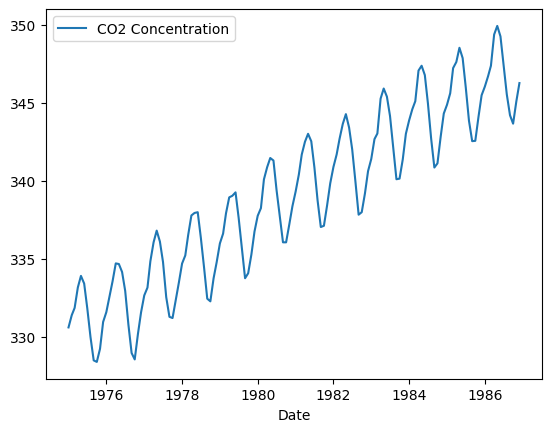

In [8]:
import seaborn as sns 
sns.lineplot(df)

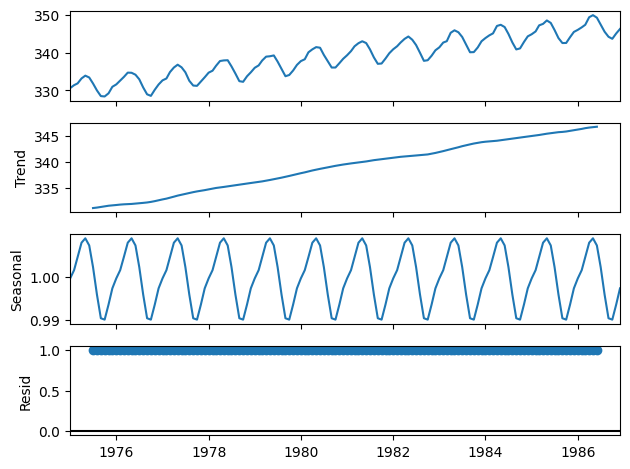

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df[['CO2 Concentration']],model='multiplicative')

result.plot()
plt.show()

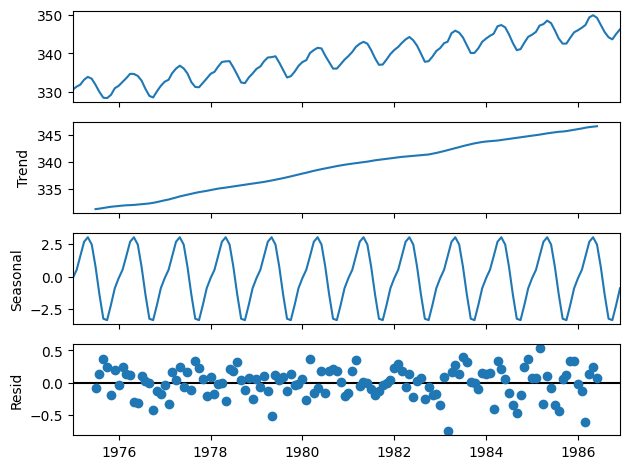

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df[['CO2 Concentration']],model='additive')

result.plot()
plt.show()

The residuals look less random in the multiplicative model → additive fits better 
Also trend and seasonality are increasing constantly thus "add"

In [21]:
import pymannkendall as mk
mk.original_test(df['CO2 Concentration'])


Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=13.22737013469656, Tau=0.7438811188811189, s=7659.0, var_s=335184.3333333333, slope=0.11999999999999982, intercept=330.545)

Mannkendalls test is used to detect increasing or decreasing trend in time series.

The pvalue less then 0.05 tells that the trend is statistically significant here it is 0.0 which states that there is very strong confidence in the detected trend 

In [22]:
train_df = df[:int(df.shape[0]*0.7)]
test_df = df[int(df.shape[0]*0.7):]

In [23]:
from statsmodels.tsa.api import ExponentialSmoothing
model_triple = ExponentialSmoothing(train_df,seasonal_periods=12,trend='add',seasonal='add')

model_triple_fit = model_triple.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
forecast_triple = model_triple_fit.forecast(44)
forecast_triple

1983-05-01    345.256582
1983-06-01    344.890266
1983-07-01    343.350302
1983-08-01    341.355264
1983-09-01    339.605338
1983-10-01    339.580260
1983-11-01    340.825313
1983-12-01    342.165305
1984-01-01    343.174334
1984-02-01    343.960996
1984-03-01    345.096530
1984-04-01    346.287635
1984-05-01    346.668441
1984-06-01    346.302126
1984-07-01    344.762161
1984-08-01    342.767124
1984-09-01    341.017197
1984-10-01    340.992120
1984-11-01    342.237173
1984-12-01    343.577165
1985-01-01    344.586193
1985-02-01    345.372856
1985-03-01    346.508389
1985-04-01    347.699494
1985-05-01    348.080301
1985-06-01    347.713985
1985-07-01    346.174021
1985-08-01    344.178983
1985-09-01    342.429057
1985-10-01    342.403979
1985-11-01    343.649032
1985-12-01    344.989025
1986-01-01    345.998053
1986-02-01    346.784715
1986-03-01    347.920249
1986-04-01    349.111354
1986-05-01    349.492161
1986-06-01    349.125845
1986-07-01    347.585881
1986-08-01    345.590843


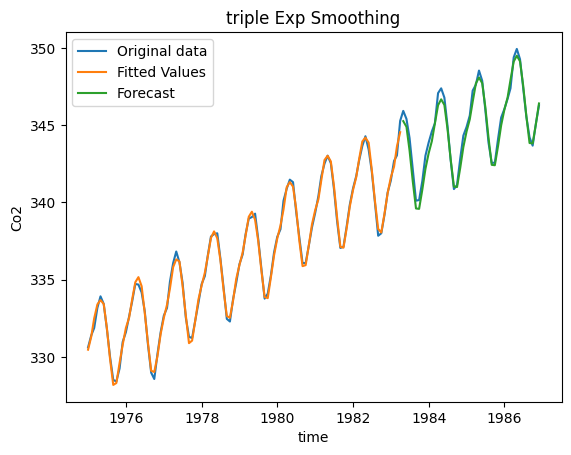

In [25]:
plt.plot(df, label='Original data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple,label='Forecast')
plt.xlabel('time')
plt.ylabel('Co2')
plt.title('triple Exp Smoothing')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train_df['CO2 Concentration'],model_triple_fit.fittedvalues)
mape_train

0.000586951839267137

In [27]:
mape_test = mean_absolute_percentage_error(test_df['CO2 Concentration'],forecast_triple)
mape_test

0.0010865833778736834